In [1]:
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'retina'
import pandas as pd

In [124]:
values = []
temp = {}
with open('polar3.csv') as file:
    for line in file:
        try:
            entries = line.split(",")
            if entries[0] == "WakeIter":
                values.append(temp)
                temp = {}
            if entries[0] == "CDt":
                temp[entries[0]] = float(entries[-1]) + 0.0089
            else:
                temp[entries[0]] = float(entries[-1])
        except:
            pass

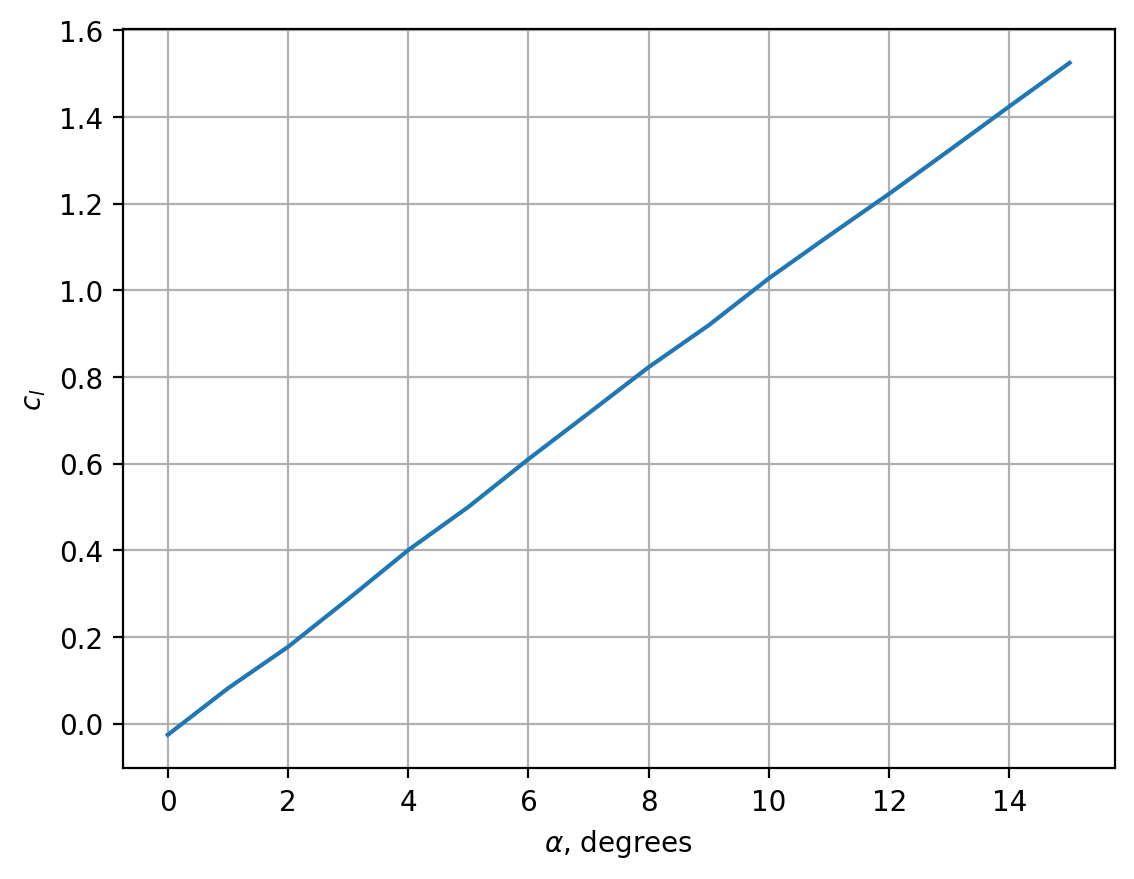

In [125]:
plt.plot([values[i]['Alpha'] for i in range(len(values))], [values[i]['CL'] for i in range(len(values))])
plt.xlabel(r"$\alpha$, degrees")
plt.ylabel(r"$c_l$")
plt.grid()
#plt.savefig("cla.png")

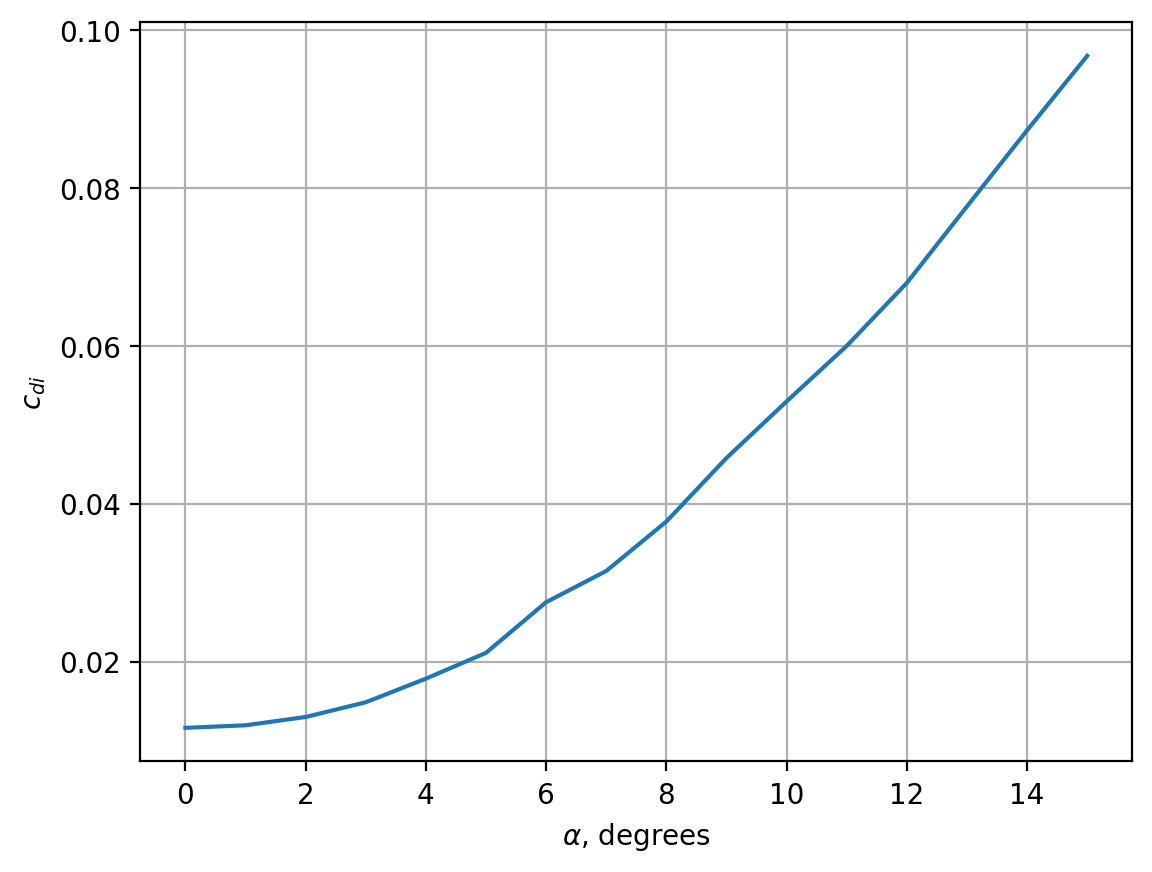

In [126]:
plt.plot([values[i]['Alpha'] for i in range(len(values))], [values[i]['CDt'] for i in range(len(values))])
plt.xlabel(r"$\alpha$, degrees")
plt.ylabel(r"$c_{di}$")
plt.grid()
#plt.savefig("cda.png")

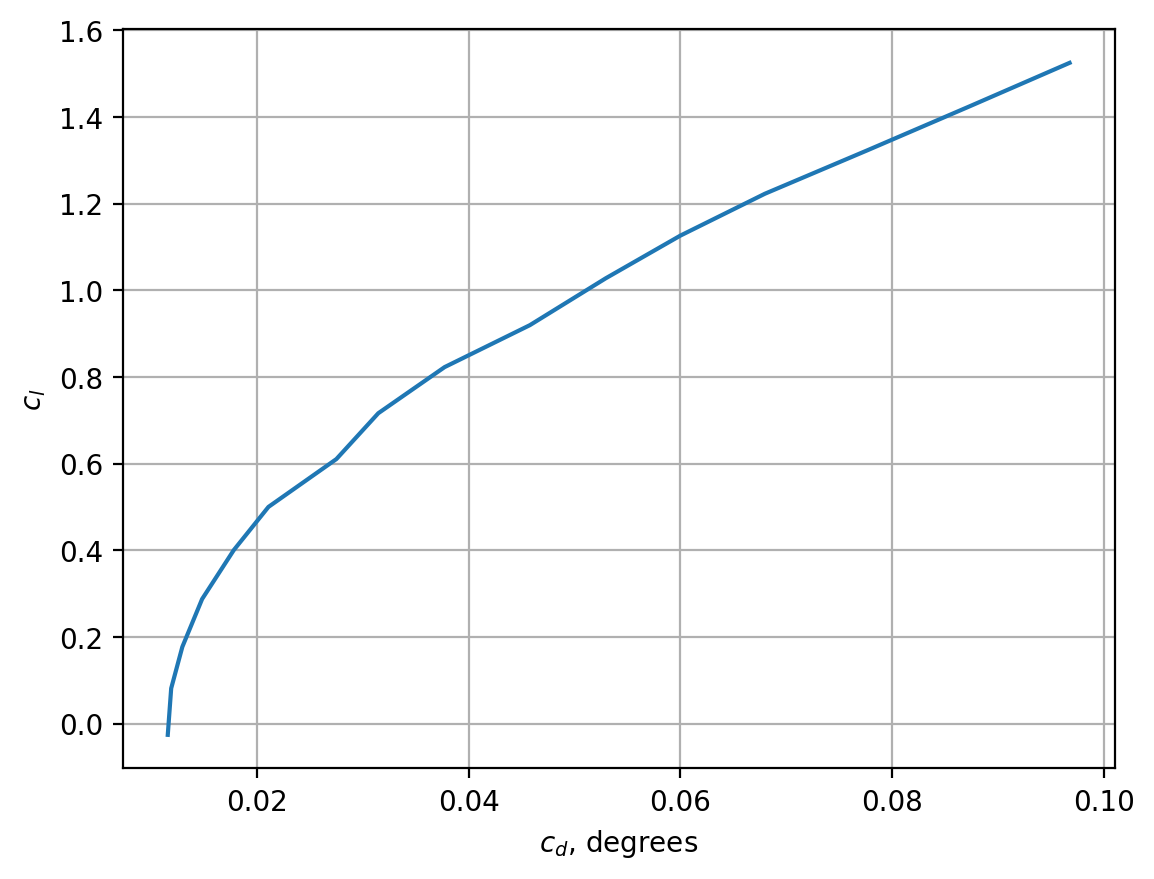

In [127]:
plt.plot([values[i]['CDt'] for i in range(len(values))], [values[i]['CL'] for i in range(len(values))])
plt.xlabel(r"$c_d$, degrees")
plt.ylabel(r"$c_l$")
plt.grid()
#plt.savefig("clcd.png")

In [145]:
def clld(cl):
    turn = 0.4
    return np.where(cl <= turn, cl*60, cl) + np.where(cl > turn, 27 - 9*cl, cl)

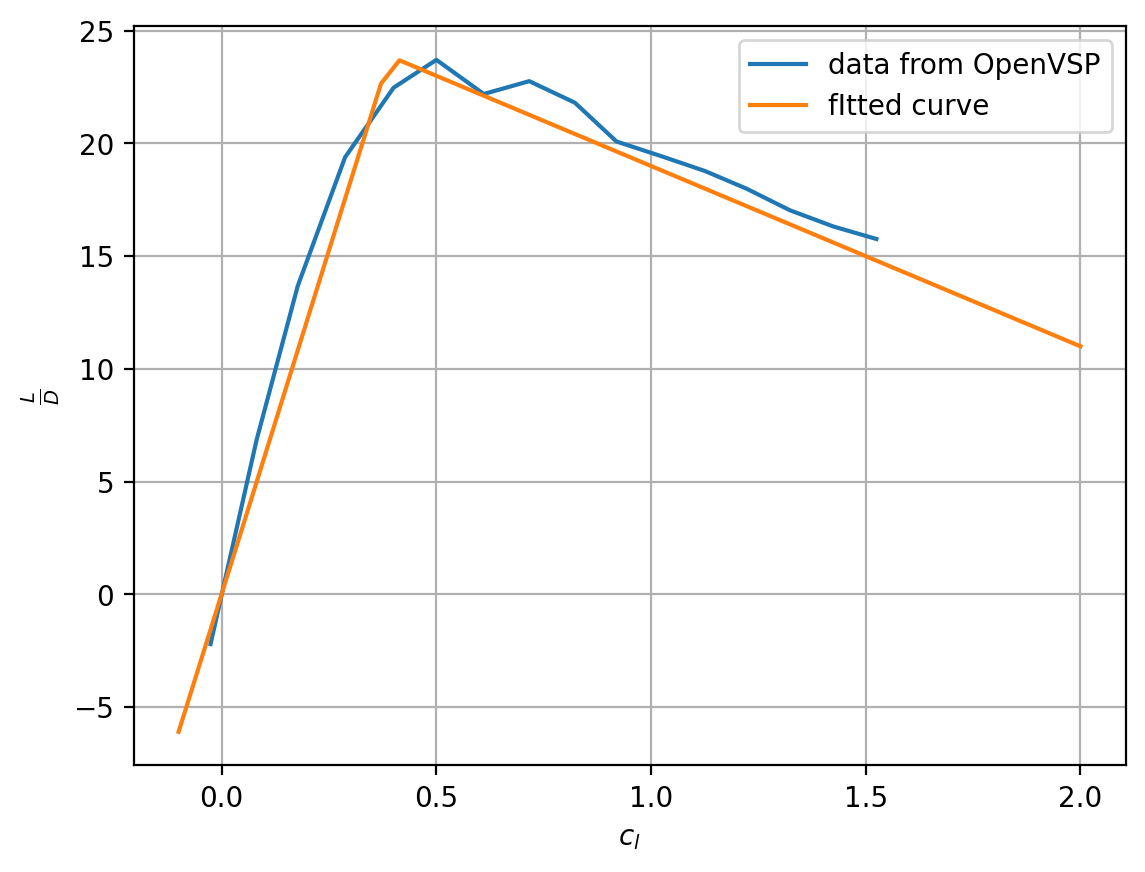

In [148]:
plt.plot([values[i]['CL'] for i in range(len(values))], [values[i]['CL']/values[i]['CDt'] for i in range(len(values))], label="data from OpenVSP")
plt.ylabel(r"$\frac{L}{D}$")
plt.xlabel(r"$c_l$")
plt.grid()
plt.plot(np.linspace(-0.1,2), clld(np.linspace(-0.1, 2)), label="fItted curve")
plt.legend()
#plt.savefig("clld.png")

In [134]:
clld(5)

-18